In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/content/Expanded_Sleep_and_Productivity_Dataset.csv")


In [77]:
df.head()

,Person_ID,Sleep_Hours,Bedtime_Hour,Wakeup_Hour,Sleep_Quality,Caffeine_Intake_mg,Electronic_Use_before_Bed_hrs,Daily_Productivity_Score
0,1,NaN,21.157146,8.210158,5,87,2.053305,1.0
1,2,10.342066,0.182052,5.420700,4,152,0.932912,3.0
2,3,7.497805,22.571780,5.808144,3,103,-1.500000,4.0
3,4,8.578509,23.542853,9.492771,4,362,3.452554,1.0
4,5,4.658876,1.537832,8.032145,5,218,3.521440,1.0


In [78]:
df.drop(['Bedtime_Hour', 'Wakeup_Hour'], axis=1)

,Person_ID,Sleep_Hours,Sleep_Quality,Caffeine_Intake_mg,Electronic_Use_before_Bed_hrs,Daily_Productivity_Score
0,1,NaN,5,87,2.053305,1.0
1,2,10.342066,4,152,0.932912,3.0
2,3,7.497805,3,103,-1.500000,4.0
3,4,8.578509,4,362,3.452554,1.0
4,5,4.658876,5,218,3.521440,1.0
...,...,...,...,...,...,...
995,96,6.889882,1,362,2.904483,1.0
996,97,6.789068,2,241,3.028325,10.0
997,98,7.099820,5,156,1.511402,4.0
998,99,5.034523,2,0,0.964339,1.0


In [79]:
print(df.describe())

         Person_ID  Sleep_Hours  Bedtime_Hour  Wakeup_Hour  Sleep_Quality  \
count  1000.000000   900.000000   1000.000000  1000.000000    1000.000000   
mean     50.500000     6.799005     13.649159     8.838007       3.130000   
std      28.880514     1.823595     10.562011     5.757073       1.440547   
min       1.000000     3.174902      0.047822     5.025308       1.000000   
25%      25.750000     5.165354      1.379348     6.384399       2.000000   
50%      50.500000     6.776177     21.507887     7.867413       3.000000   
75%      75.250000     8.325767     22.576339     9.005308       4.250000   
max     100.000000    10.781580     23.954465    34.450027       5.000000   

       Caffeine_Intake_mg  Electronic_Use_before_Bed_hrs  \
count         1000.000000                    1000.000000   
mean           365.755000                       1.707916   
std           1246.112299                       1.332507   
min              0.000000                      -3.000000   
25%   

In [80]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Person_ID                      1000 non-null   int64  
 1   Sleep_Hours                    900 non-null    float64
 2   Bedtime_Hour                   1000 non-null   float64
 3   Wakeup_Hour                    1000 non-null   float64
 4   Sleep_Quality                  1000 non-null   int64  
 5   Caffeine_Intake_mg             1000 non-null   int64  
 6   Electronic_Use_before_Bed_hrs  1000 non-null   float64
 7   Daily_Productivity_Score       950 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 62.6 KB
None


In [81]:
print(df.shape)

(1000, 8)


In [82]:
df.isna().any()

,0
Person_ID,False
Sleep_Hours,True
Bedtime_Hour,False
Wakeup_Hour,False
Sleep_Quality,False
Caffeine_Intake_mg,False
Electronic_Use_before_Bed_hrs,False
Daily_Productivity_Score,True


In [83]:
print(df.isna().sum())

Person_ID                          0
Sleep_Hours                      100
Bedtime_Hour                       0
Wakeup_Hour                        0
Sleep_Quality                      0
Caffeine_Intake_mg                 0
Electronic_Use_before_Bed_hrs      0
Daily_Productivity_Score          50
dtype: int64


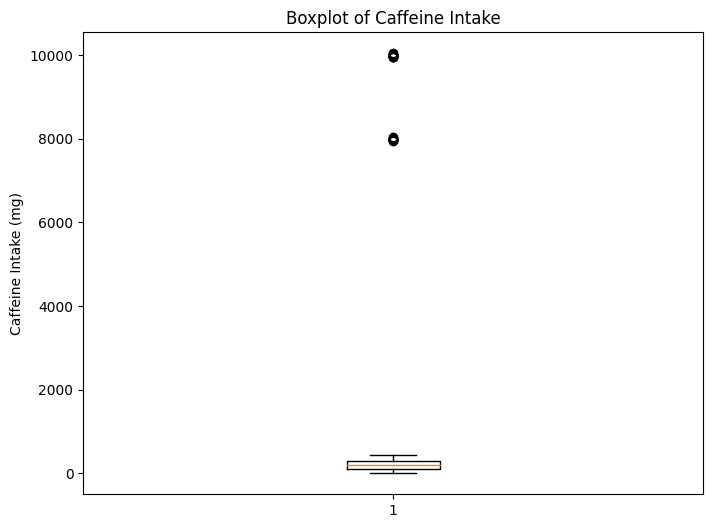

In [84]:
plt.figure(figsize=(8,6))
plt.boxplot(df['Caffeine_Intake_mg'])
plt.title('Boxplot of Caffeine Intake')
plt.ylabel('Caffeine Intake (mg)')
plt.show()


<Figure size 800x400 with 0 Axes>

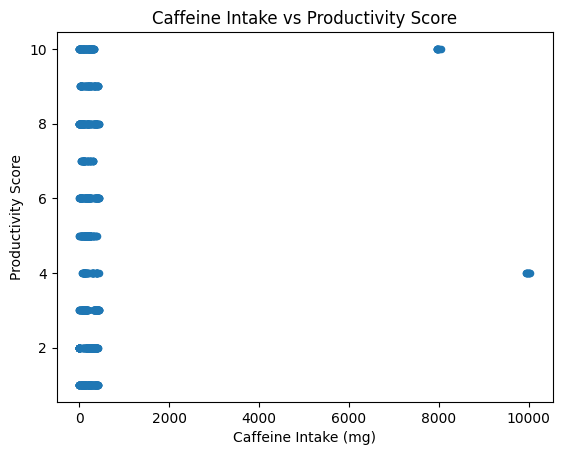

In [85]:
plt.figure(figsize=(8,4))
df.plot(x='Caffeine_Intake_mg', y='Daily_Productivity_Score',kind='scatter')
plt.title('Caffeine Intake vs Productivity Score')
plt.xlabel('Caffeine Intake (mg)')
plt.ylabel('Productivity Score')
plt.show()

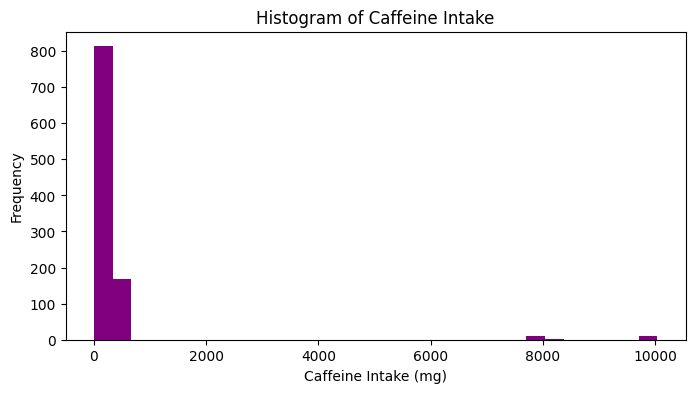

In [86]:
plt.figure(figsize=(8,4))
plt.hist(df['Caffeine_Intake_mg'], bins=30, color='purple')
plt.title('Histogram of Caffeine Intake')
plt.xlabel('Caffeine Intake (mg)')
plt.ylabel('Frequency')
plt.show()

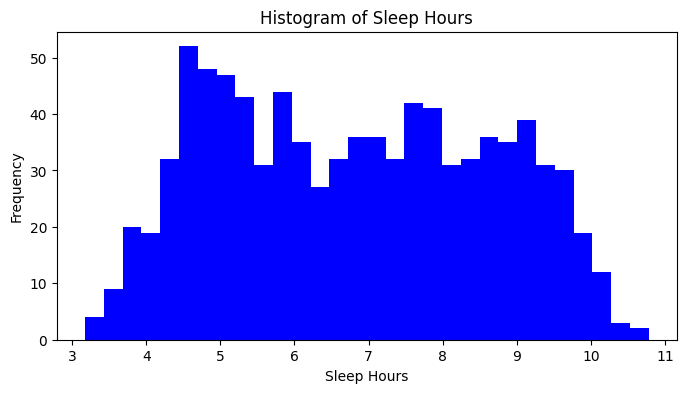

In [87]:
plt.figure(figsize=(8,4))
plt.hist(df['Sleep_Hours'], bins=30, color='blue')
plt.title('Histogram of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()


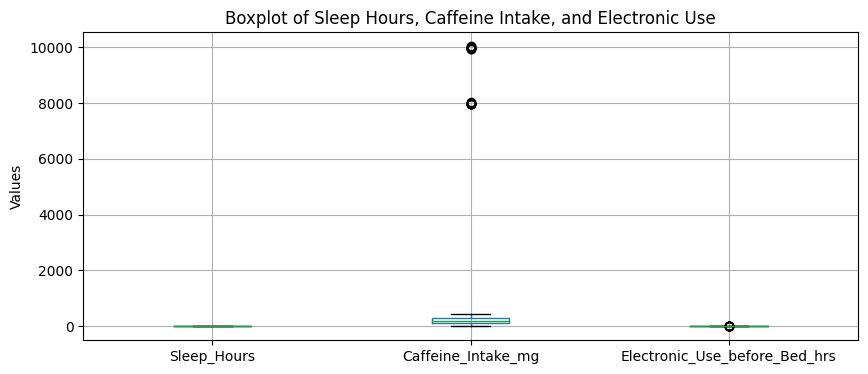

In [88]:
plt.figure(figsize=(10,4))
df[['Sleep_Hours', 'Caffeine_Intake_mg', 'Electronic_Use_before_Bed_hrs']].boxplot()
plt.title('Boxplot of Sleep Hours, Caffeine Intake, and Electronic Use')
plt.ylabel('Values')
plt.show()


In [89]:
# استبدال القيم المفقودة في عدد ساعات النوم والإنتاجية بالمتوسط
df['Sleep_Hours'].fillna(df['Sleep_Hours'].mean(), inplace=True)
df['Daily_Productivity_Score'].fillna(df['Daily_Productivity_Score'].mean(), inplace=True)

In [90]:
# التحقق من القيم السالبة في جميع الأعمدة
negative_values = (df < 0).any()

# عرض الأعمدة التي تحتوي على قيم سالبة
print(negative_values)


Person_ID                        False
Sleep_Hours                      False
Bedtime_Hour                     False
Wakeup_Hour                      False
Sleep_Quality                    False
Caffeine_Intake_mg               False
Electronic_Use_before_Bed_hrs     True
Daily_Productivity_Score         False
dtype: bool


In [91]:
# إزالة القيم المتطرفة في استهلاك الكافيين
df = df[df['Caffeine_Intake_mg'] <= 1000]  # إزالة القيم الكبيرة جدًا (حد منطقي)

# التحقق من القيم غير المنطقية في ساعات استخدام الأجهزة الإلكترونية
df = df[df['Electronic_Use_before_Bed_hrs'] >= 0]  # إزالة القيم السالبة

In [92]:
# التحقق من القيم السالبة في جميع الأعمدة
negative_values = (df < 0).any()

# عرض الأعمدة التي تحتوي على قيم سالبة
print(negative_values)


Person_ID                        False
Sleep_Hours                      False
Bedtime_Hour                     False
Wakeup_Hour                      False
Sleep_Quality                    False
Caffeine_Intake_mg               False
Electronic_Use_before_Bed_hrs    False
Daily_Productivity_Score         False
dtype: bool


In [93]:
# تصحيح أوقات الاستيقاظ التي تتجاوز 24 ساعة
df['Wakeup_Hour'] = df['Wakeup_Hour'] % 24

In [94]:
print(df.describe())
print('------------------------------------------------------------------------')
print(df.isnull().sum())


        Person_ID  Sleep_Hours  Bedtime_Hour  Wakeup_Hour  Sleep_Quality  \
count  930.000000   930.000000    930.000000   930.000000     930.000000   
mean    51.860215     6.784263     13.203880     7.659953       3.107527   
std     28.752532     1.711964     10.620826     1.494778       1.448524   
min      1.000000     3.174902      0.047822     5.025308       1.000000   
25%     27.000000     5.344029      1.357303     6.403862       2.000000   
50%     53.000000     6.799005     21.384900     7.884519       3.000000   
75%     76.000000     8.115104     22.424202     8.978963       4.000000   
max    100.000000    10.781580     23.954465    10.450027       5.000000   

       Caffeine_Intake_mg  Electronic_Use_before_Bed_hrs  \
count          930.000000                     930.000000   
mean           193.331183                       1.873395   
std            122.970981                       1.096782   
min              0.000000                       0.054688   
25%            

** (Exploratory Data Analysis)**

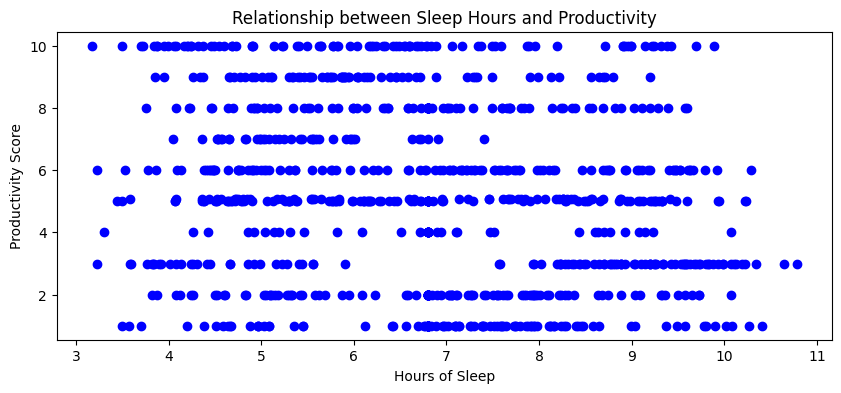

In [95]:
plt.figure(figsize=(10,4))
plt.scatter(df['Sleep_Hours'], df['Daily_Productivity_Score'], color='blue')
plt.title('Relationship between Sleep Hours and Productivity')
plt.xlabel('Hours of Sleep')
plt.ylabel('Productivity Score')
plt.show()

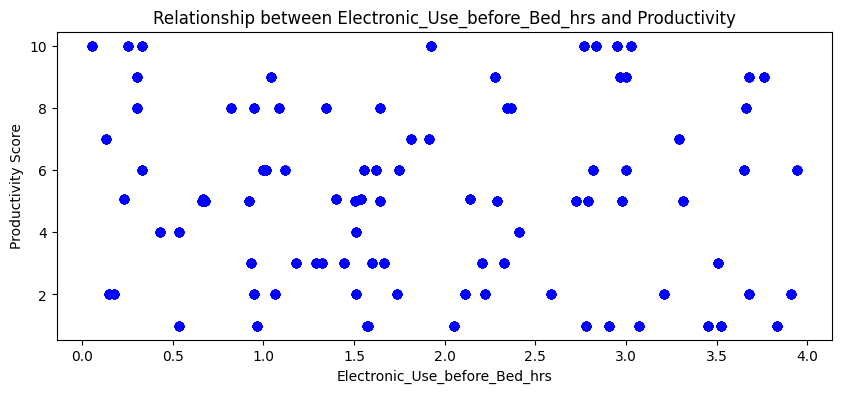

In [133]:
plt.figure(figsize=(10,4))
plt.scatter(df['Electronic_Use_before_Bed_hrs'], df['Daily_Productivity_Score'], color='blue')
plt.title('Relationship between Electronic_Use_before_Bed_hrs and Productivity')
plt.xlabel('Electronic_Use_before_Bed_hrs')
plt.ylabel('Productivity Score')
plt.show()

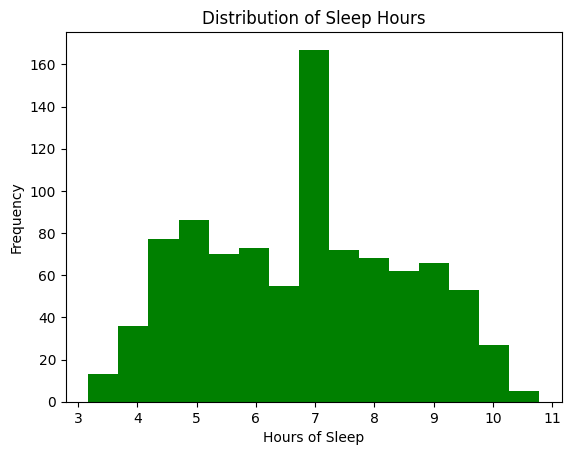

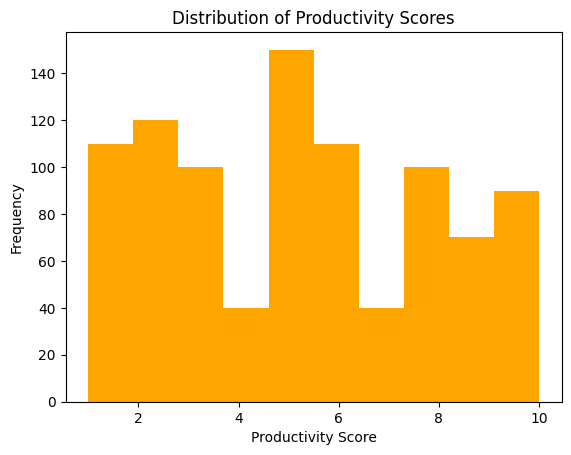

In [96]:
# توزيع عدد ساعات النوم
plt.hist(df['Sleep_Hours'], bins=15, color='green')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.show()

# توزيع درجات الإنتاجية
plt.hist(df['Daily_Productivity_Score'], bins=10, color='orange')
plt.title('Distribution of Productivity Scores')
plt.xlabel('Productivity Score')
plt.ylabel('Frequency')
plt.show()


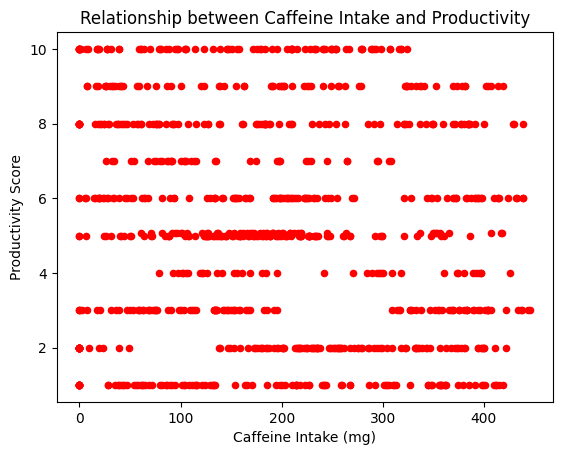

In [97]:
df.plot(x='Caffeine_Intake_mg', y='Daily_Productivity_Score',kind='scatter',color='red')
plt.title('Relationship between Caffeine Intake and Productivity')
plt.xlabel('Caffeine Intake (mg)')
plt.ylabel('Productivity Score')
plt.show()


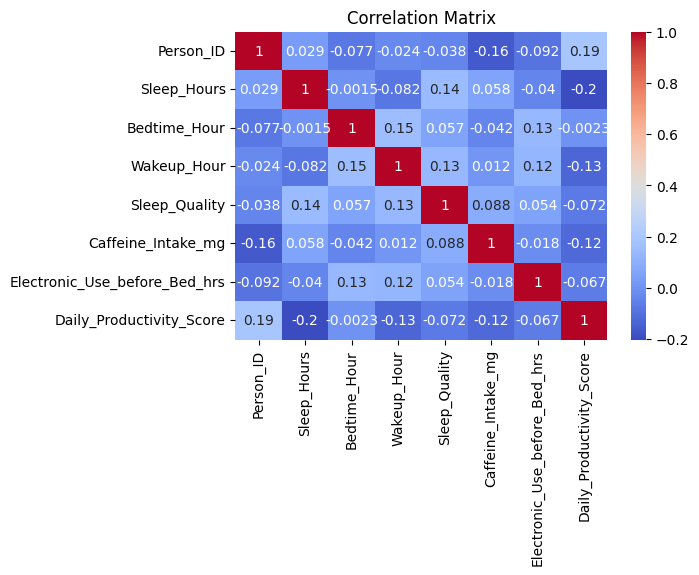

In [98]:
correlation_matrix = df.corr()

import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Text(0, 0.5, 'Average Sleep_Hours')

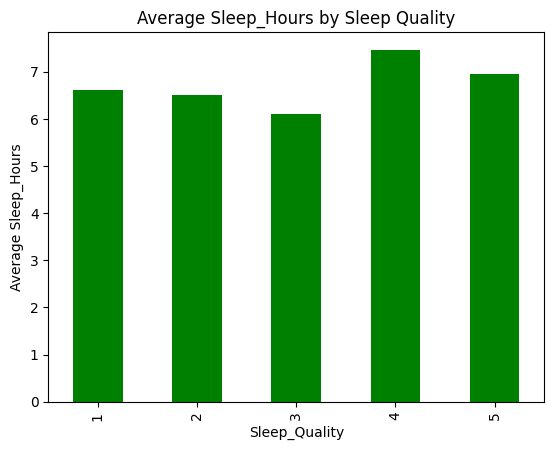

In [99]:
sq = df.groupby('Sleep_Quality')['Sleep_Hours'].mean()
sq.plot(kind='bar', color='green')
plt.title('Average Sleep_Hours by Sleep Quality')
plt.ylabel('Average Sleep_Hours')

Text(0.5, 1.0, 'Average Productivity Score by Sleep Quality')

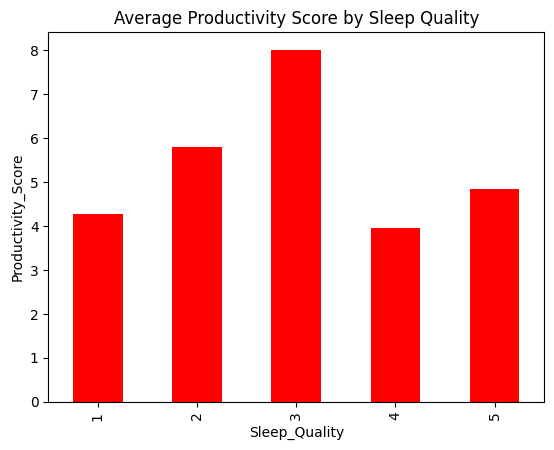

In [100]:
avg = df.groupby('Sleep_Quality')['Daily_Productivity_Score'].mean()
avg.plot(kind='bar', color='red')
plt.ylabel('Productivity_Score')
plt.title('Average Productivity Score by Sleep Quality')

In [101]:
# حساب عدد الأشخاص الذين ينامون أقل من 6 ساعات
less_than_6_hours = df[df['Sleep_Hours'] < 6].shape[0]
print(f"Number of people who sleep less than 6 hours: {less_than_6_hours}")


Number of people who sleep less than 6 hours: 328


In [102]:
# استعراض عددالأشخاص الذين يتناولون أكثر من 400 ملغ من الكافيين
high_caffeine_consumers = df[df['Caffeine_Intake_mg'] > 400].shape[0]
print(f'Number of people who consume more than 400 mg of caffeine: {high_caffeine_consumers} ')

Number of people who consume more than 400 mg of caffeine: 41 


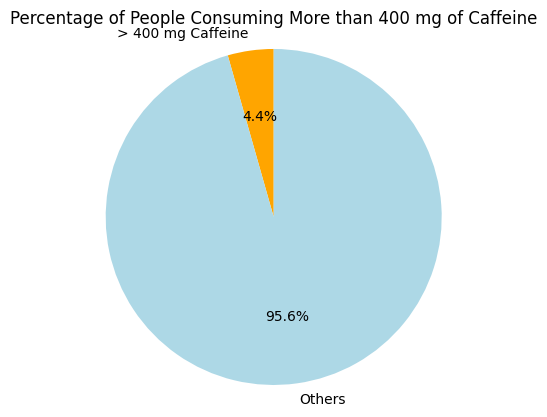

In [103]:
# حساب عدد الأشخاص الذين يتناولون أكثر من 400 ملغ من الكافيين
high_caffeine_consumers = df[df['Caffeine_Intake_mg'] > 400].shape[0]

# إجمالي عدد الأشخاص في البيانات
total_people = df.shape[0]

# البيانات لرسم Pie Chart
labels = ['> 400 mg Caffeine', 'Others']
sizes = [high_caffeine_consumers, total_people - high_caffeine_consumers]
colors = ['orange', 'lightblue']

# رسم Pie Chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of People Consuming More than 400 mg of Caffeine')
plt.axis('equal')
plt.show()


In [104]:
# حساب متوسط الإنتاجية للأشخاص الذين ينامون أكثر من 8 ساعات
average_productivity_more_than_8_hours = df[df['Sleep_Hours'] > 8]['Daily_Productivity_Score'].mean()
print(f"Average productivity for people who sleep more than 8 hours: {average_productivity_more_than_8_hours}")


Average productivity for people who sleep more than 8 hours: 4.5128316659417145


In [105]:
# استعراض أعلى 5 أشخاص من حيث استهلاك الكافيين
top_5_caffeine_consumers = df[['Caffeine_Intake_mg', 'Sleep_Hours', 'Daily_Productivity_Score']].sort_values(by='Caffeine_Intake_mg', ascending=False).head(5)
print(top_5_caffeine_consumers)


     Caffeine_Intake_mg  Sleep_Hours  Daily_Productivity_Score
174                 446     9.420886                       3.0
774                 444     8.189711                       3.0
262                 439     9.525384                       6.0
647                 439     7.103519                       8.0
362                 439     8.174975                       6.0


In [106]:
# حساب معامل الارتباط بين ساعات النوم والإنتاجية
correlation_sleep_productivity = df['Sleep_Hours'].corr(df['Daily_Productivity_Score'])
print(f"Correlation between Sleep Hours and Productivity: {correlation_sleep_productivity}")


Correlation between Sleep Hours and Productivity: -0.20183843920523972


In [107]:
# استعراض الأشخاص الذين يستخدمون الأجهزة الإلكترونية قبل النوم لأكثر من ساعتين
long_electronic_use = df[df['Electronic_Use_before_Bed_hrs'] > 2].shape[0]
print(long_electronic_use)


400


In [108]:
# حساب متوسط جودة النوم للأشخاص الذين يتناولون أقل من 100 ملغ من الكافيين
average_sleep_quality_low_caffeine = df[df['Caffeine_Intake_mg'] < 100]['Sleep_Quality'].mean()
print(f"Average Sleep Quality for people consuming less than 100mg of caffeine: {average_sleep_quality_low_caffeine}")

Average Sleep Quality for people consuming less than 100mg of caffeine: 3.076


In [109]:
# حساب عدد الأشخاص الذين لديهم جودة نوم أعلى من 4 وإنتاجية أكثر من 8
high_quality_and_high_productivity = df[(df['Sleep_Quality'] > 4) & (df['Daily_Productivity_Score'] > 8)].shape[0]

# عرض النتيجة
print(f"Number of people with Sleep Quality > 4 and Productivity Score > 8: {high_quality_and_high_productivity}")


Number of people with Sleep Quality > 4 and Productivity Score > 8: 30


In [110]:
# حساب متوسط عدد ساعات استخدام الأجهزة الإلكترونية قبل النوم للأشخاص الذين ينامون أقل من 6 ساعات
average_electronics_use_less_than_6_hours = df[df['Sleep_Hours'] < 6]['Electronic_Use_before_Bed_hrs'].mean()
print(f"Average Electronic Use for people who sleep less than 6 hours: {average_electronics_use_less_than_6_hours}")


Average Electronic Use for people who sleep less than 6 hours: 1.8415073781859914


In [115]:
er=df[(df['Sleep_Hours'] > 5 ) & (df['Sleep_Quality'] < 4 )][['Sleep_Quality','Sleep_Hours']]

In [131]:
er.groupby('Sleep_Quality')['Sleep_Hours'].mean()

,Sleep_Hours
Sleep_Quality,
1,7.145851
2,7.090219
3,7.059948


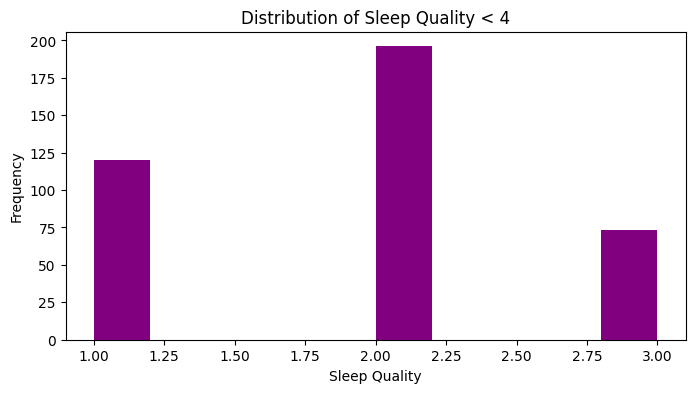

In [127]:
plt.figure(figsize=(8,4))
plt.hist(er['Sleep_Quality'],bins=10, color='purple')
plt.title('Distribution of Sleep Quality < 4')
plt.xlabel('Sleep Quality')
plt.ylabel('Frequency')
plt.show()
